# Code for WebScrapping

In [ ]:
# Input the selected year and month
year = 2014
month = 1
nbDays = calendar.monthrange(year,month)[1]

# For each day in the selected month
for x in range(1, nbDays+1):

# Build the date string

    if x<10:
        day_str = "0" + str(x)
    else:
        day_str = str(x)
    if month<10:
        month_str = "0" + str(month)
    else:
        month_str = str(month)
        year_str = str(year)
        date = year_str + "-" + month_str + "-" + day_str

# While the received data is incorrect (max. 3 trials)
nbEl = 0
trials = 1
while(nbEl<1 and trials<=3):
print("Extracting day-ahead data for " + date + " - Trial " + str(trials))

# Read data from the webpage
table = pd.read_html("https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/" + date + "/DE", attrs={'class': 'list hours responsive'})[0]

# Extract the last column (i.e., the selected day)
last_column = table.iloc[:,8]
nbEl = last_column.shape[0]

#print("Number of read elements: " + str(nbEl))

# Extract volumes
volumes = last_column.iloc[::2]
volumes.drop(volumes.index[0], inplace=True)
volumes = volumes.reset_index(drop=True)

# Extract prices
prices = last_column.iloc[1::2]
prices = prices.reset_index(drop=True)

# Save as CSV file
export = pd.concat([volumes, prices], axis=1)
export.to_csv('' + date + '.csv', index=False, header=False)

# Wait 1 second
time.sleep(1)

# Increase trials counter
trials = trials+1

# Data importing and cleaing.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())
from bokeh.plotting import figure, output_file, show 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
#read in data
#Data for Germany 
Germany_DayAheadAuction = pd.read_csv('C:/Users/kkusterer/Documents/PythonIndividualDATA/EPEX SPOT/EPEX SPOT/Germany/DayAheadAuctionEPEXSPOT_DE.csv', sep =',')
Ge_Lu_DayAheadAuction = pd.read_csv('C:/Users/kkusterer/Documents/PythonIndividualDATA/EPEX SPOT/EPEX SPOT/Germany/DayAheadAuctionEPEXSPOT_DE_LU.csv', sep =',')

In [5]:
#Germany check table amount of NAN
Germany_DayAheadAuction.isna().sum().sum()


87742

In [6]:
#Germany/Luxembourg check table amount of NAN
Ge_Lu_DayAheadAuction.isna().sum().sum()

4730

In [7]:
#Germany print table head
Germany_DayAheadAuction.head()

,Unnamed: 0,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,...,OffPeak,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,PeakPrice,PeakVolume
0,1,2014-01-01 00:00:00,15.15,25906.8,12.98,10.6,11.56,17.99,31.96,19.2,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
1,2,2014-01-01 01:00:00,12.96,27601.2,12.98,10.6,11.56,17.99,31.96,19.2,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
2,3,2014-01-01 02:00:00,12.09,29032.0,12.98,10.6,11.56,17.99,31.96,19.2,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
3,4,2014-01-01 03:00:00,11.70,29543.0,12.98,10.6,11.56,17.99,31.96,19.2,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
4,5,2014-01-01 04:00:00,11.66,29467.5,12.98,10.6,11.56,17.99,31.96,19.2,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN


In [8]:
#Germany/Luxembourg check table amount of NAN
Ge_Lu_DayAheadAuction.head()

,Unnamed: 0,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,...,OffPeak,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,PeakPrice,PeakVolume
0,1,2018-10-01 00:00:00,59.53,17572.0,53.61,61.41,77.47,58.14,64.68,52.16,...,57.51,67.8,55.73,77.75,67.18,55.74,61.24,552501.9,NaN,NaN
1,2,2018-10-01 01:00:00,56.10,18524.5,53.61,61.41,77.47,58.14,64.68,52.16,...,57.51,67.8,55.73,77.75,67.18,55.74,61.24,552501.9,NaN,NaN
2,3,2018-10-01 02:00:00,51.41,19033.2,53.61,61.41,77.47,58.14,64.68,52.16,...,57.51,67.8,55.73,77.75,67.18,55.74,61.24,552501.9,NaN,NaN
3,4,2018-10-01 03:00:00,47.38,18313.7,53.61,61.41,77.47,58.14,64.68,52.16,...,57.51,67.8,55.73,77.75,67.18,55.74,61.24,552501.9,NaN,NaN
4,5,2018-10-01 04:00:00,47.59,17949.1,53.61,61.41,77.47,58.14,64.68,52.16,...,57.51,67.8,55.73,77.75,67.18,55.74,61.24,552501.9,NaN,NaN


In [9]:
#Germany drop columns 
Germany_DayAheadAuction = Germany_DayAheadAuction.drop(columns = ['PeakPrice','PeakVolume'])


In [10]:
#Germany/Luxembourg drop columns 
Ge_Lu_DayAheadAuction = Ge_Lu_DayAheadAuction.drop(columns = ['PeakPrice','PeakVolume'])


In [11]:
#Germany fill nan with middles values
Germany_Auction = Germany_DayAheadAuction.fillna(Germany_DayAheadAuction.mean())
#Germany check for NAN
Germany_Auction.isna().sum().sum()

0

In [12]:
#Germany/Luxembourg fill nan with middles values
Ge_Lu_DayAheadAuction = Ge_Lu_DayAheadAuction.fillna(Ge_Lu_DayAheadAuction.mean())
#Germany/Luxembourg check for NAN
Ge_Lu_DayAheadAuction.isna().sum().sum()

0

In [13]:
#Convert date to a datetime
#Germany
Germany_Auction['DateTime'] = pd.to_datetime(Germany_DayAheadAuction['DateTime'])

In [14]:
#Convert date to a datetime
#Germany/Luxembourg
Ge_Lu_DayAheadAuction['DateTime'] = pd.to_datetime(Ge_Lu_DayAheadAuction['DateTime'])

In [15]:
#To drop unuseful columns
Germany_Auction = Germany_Auction.drop(columns = ['Unnamed: 0'])

In [16]:
#To drop unuseful columns
#Germany/Luxembourg
Ge_Lu_DayAheadAuction = Ge_Lu_DayAheadAuction.drop(columns = ['Unnamed: 0'])

In [17]:
#Germany_AuctionComplete.head()

In [18]:
def timedate (datecode): #To seperate date and time into a useable format
    Year = "20" + str(datecode)[2:4]
    Month = str(datecode)[5:7]
    Day = str(datecode)[8:10]
    Time = str(datecode)[11:19]
    
    return pd.Series({'Year':Year,'Month':Month,'Day':Day,'Time':Time})

In [19]:
#Applying the function to the table
Germany_Auction[['Year','Month','Day','Time']] = Germany_Auction["DateTime"].apply(timedate)

#To drop unuseful column from the table
Germany_Auction = Germany_Auction.drop(columns = ['DateTime'])

Germany_Auction.head()

,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,OffPeak1,...,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,Year,Month,Day,Time
0,15.15,25906.8,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,13.51,27.0,23.27,16.17,17.38,715188.0,2014,01,01,00:00:00
1,12.96,27601.2,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,13.51,27.0,23.27,16.17,17.38,715188.0,2014,01,01,01:00:00
2,12.09,29032.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,13.51,27.0,23.27,16.17,17.38,715188.0,2014,01,01,02:00:00
3,11.70,29543.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,13.51,27.0,23.27,16.17,17.38,715188.0,2014,01,01,03:00:00
4,11.66,29467.5,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,13.51,27.0,23.27,16.17,17.38,715188.0,2014,01,01,04:00:00


In [20]:
#Applying the function to the table
Ge_Lu_DayAheadAuction[['Year','Month','Day','Time']] = Ge_Lu_DayAheadAuction["DateTime"].apply(timedate)

#To drop unuseful column from the table
Ge_Lu_DayAheadAuction = Ge_Lu_DayAheadAuction.drop(columns = ['DateTime'])

Ge_Lu_DayAheadAuction.head()

,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,OffPeak1,...,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,Year,Month,Day,Time
0,59.53,17572.0,53.61,61.41,77.47,58.14,64.68,52.16,61.24,66.76,...,55.73,77.75,67.18,55.74,61.24,552501.9,2018,10,01,00:00:00
1,56.10,18524.5,53.61,61.41,77.47,58.14,64.68,52.16,61.24,66.76,...,55.73,77.75,67.18,55.74,61.24,552501.9,2018,10,01,01:00:00
2,51.41,19033.2,53.61,61.41,77.47,58.14,64.68,52.16,61.24,66.76,...,55.73,77.75,67.18,55.74,61.24,552501.9,2018,10,01,02:00:00
3,47.38,18313.7,53.61,61.41,77.47,58.14,64.68,52.16,61.24,66.76,...,55.73,77.75,67.18,55.74,61.24,552501.9,2018,10,01,03:00:00
4,47.59,17949.1,53.61,61.41,77.47,58.14,64.68,52.16,61.24,66.76,...,55.73,77.75,67.18,55.74,61.24,552501.9,2018,10,01,04:00:00


In [21]:
#Merge the 2 tables
Prac2_table = pd.merge(Germany_Auction,Ge_Lu_DayAheadAuction, how='outer')

In [22]:
#Change the name of the 2 tables
Germany_AuctionComplete = Prac2_table
Germany_AuctionComplete.set_index('Year').head()

,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,OffPeak1,...,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,Month,Day,Time
Year,,,,,,,,,,,,,,,,,,,,,
2014,15.15,25906.8,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,01,01,00:00:00
2014,12.96,27601.2,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,01,01,01:00:00
2014,12.09,29032.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,01,01,02:00:00
2014,11.70,29543.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,01,01,03:00:00
2014,11.66,29467.5,12.98,10.6,11.56,17.99,31.96,19.2,12.49,11.79,...,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,01,01,04:00:00


# Plotting with Bokeh

In [23]:
#Apply groupby to create a sepretate table showing the change in average price over the years
Germany_AuctionGroupBy = Germany_AuctionComplete.groupby(by = ['Year'])["Prices"].agg("mean")
#Create a dataframe from summarised data to plot
Germany_AuctionGroupBy = pd.DataFrame(data=[Germany_AuctionGroupBy])
#Print the head of the DataFrame
Germany_AuctionGroupBy.head()

Year,2014,2015,2016,2017,2018
Prices,32.763796,31.630279,28.986129,34.188535,45.355601


In [24]:
Germany_AuctionGroupBy.reset_index(drop=True)

Year,2014,2015,2016,2017,2018
0,32.763796,31.630279,28.986129,34.188535,45.355601


In [49]:

output_file("line.html")

p = figure(plot_width=1000, plot_height=1000)

p.line([2014,2015,2016,2017,2018],[32.763796, 31.630279, 28.986129, 34.188535, 43.45133], line_width=2)

show(p)

In [26]:
#Apply GroupBy For month 
Germany_AuctionGroupByMonth = Germany_AuctionComplete.groupby(by = ['Month'])["Prices"].agg("mean")
#Create a dataframe from summarised data
Germany_AuctionGroupByMonth = pd.DataFrame(data=[Germany_AuctionGroupByMonth])
#Print the head of the new dataframe
Germany_AuctionGroupByMonth.head()





Month,01,02,03,04,05,06,07,08,09,10,11,12
Prices,35.09379,34.333877,31.152829,29.289425,28.50571,32.341019,35.323048,34.751078,41.562378,39.024737,40.805339,35.409075


In [27]:
#To create a Bokeh line graph

output_file("line.html")

p = figure(plot_width=1000, plot_height=1000)

p.line([1,2,3,4,5,6,7,8,9,10,11,12],[35.09379,34.333877,31.152829,29.289425,28.50571,32.341019,35.323048,34.751078,41.562378
,34.987055,36.83767,32.228313], line_width=2, color = "navy")

show(p)

In [28]:
Germany_AuctionGroupByDay = Germany_AuctionComplete.groupby(by = ['Day'])["Prices"].agg("mean")

Germany_AuctionGroupByDay = pd.DataFrame(data=[Germany_AuctionGroupByDay])

Germany_AuctionGroupByDay.head()

Day,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Prices,30.543771,33.179877,33.711981,35.43459,36.453142,35.661762,34.561469,33.335771,34.277542,33.945833,...,33.650568,35.381424,35.06852,39.124792,36.359906,38.311245,36.923116,35.14931,34.968653,33.742223


In [29]:
#To create a Bokeh line graph
                          
output_file("line.html")

p = figure(plot_width=1000, plot_height=1000)

p.line([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[29.414137,32.532054,33.740066,33.913852,34.853421,34.144605,33.3303,32.658363,33.625541,33.251776,
                                                                                             32.423721,32.773238,33.838077,33.805029,33.515958,34.838019,34.441996,34.63712,35.492807,34.412936,
                                                                                             33.908233,32.431255,34.467197,34.38147,39.056726,35.344759,37.322437,36.270333,34.589337,34.664196,32.763442]
,line_width=2, color = "firebrick")

show(p)


In [30]:
Germany_AuctionGroupByTime = Germany_AuctionComplete.groupby(by = ['Time'])["Prices"].agg("mean")

Germany_AuctionGroupByTime = pd.DataFrame(data=[Germany_AuctionGroupByTime])

Germany_AuctionGroupByTime.head()

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Prices,28.580598,26.542651,25.356535,24.416268,24.948399,27.189309,33.762547,40.549886,42.579064,40.953316,...,32.587952,33.82317,35.749189,41.414267,45.384122,46.453612,42.495556,38.390546,36.230821,30.913373


In [31]:
#To create a Bokeh line graph

output_file("line.html")

p = figure(plot_width=1000, plot_height=1000)

p.line([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],[27.884419,25.854283,24.567979,23.692278,24.230947,26.46466,32.961134,39.625964,41.570865,39.890383,
                                                                        37.625931,36.71103,34.118089,32.286993,31.454124,32.65195,34.513133,40.106435,44.222267,45.380471,
                                                                        41.597749,37.657306,35.551019,30.294272],
line_width=2, color = "olive")

show(p)


In [32]:
#Wanted to use to plot the graphs in the same place for easier comparison, but I was unable to import vplot

#from bokeh.io import vplot


#output_file("layout.html")


#s1 = figure(plot_width=400, plot_height=400)

#p.line([1,2,3,4,5,6,7,8,9,10,11,12],[35.09379,34.333877,31.152829,29.289425,28.50571,32.341019,35.323048,34.751078,41.562378
#,34.987055,36.83767,32.228313], line_width=2, color = "navy")



#s2 = figure(plot_width=400, plot_height=400)

#p.line([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[29.414137,32.532054,33.740066,33.913852,34.853421,34.144605,33.3303,32.658363,33.625541,33.251776,
                                                                                             #32.423721,32.773238,33.838077,33.805029,33.515958,34.838019,34.441996,34.63712,35.492807,34.412936,
                                                                                             #33.908233,32.431255,34.467197,34.38147,39.056726,35.344759,37.322437,36.270333,34.589337,34.664196,32.763442]
#,line_width=2, color = "firebrick")



#s3 = figure(plot_width=400, plot_height=400)

#p.line([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],[27.884419,25.854283,24.567979,23.692278,
                                                                        #24.230947,26.46466,32.961134,39.625964,41.570865,39.890383,37.625931,36.71103,34.118089,
                                                                        #32.286993,31.454124,32.65195,34.513133,40.106435,44.222267,45.380471,41.597749,37.657306,
                                                                        #35.551019,30.294272],
#line_width=2 , color = "olive")


#p = vplot(s1, s2, s3)

#show(p)


# Checking Disturbution of Prices

In [33]:
Germany_AuctionComplete.Prices.describe()

count    46206.000000
mean        35.130217
std         16.119194
min       -130.090000
25%         26.100000
50%         33.420000
75%         43.710000
max        163.520000
Name: Prices, dtype: float64

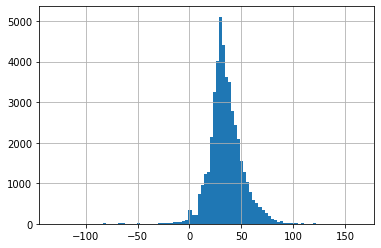

In [34]:
Germany_AuctionComplete.Prices.hist(bins=100)

In [35]:
Germany_AuctionComplete.Volume.describe()

count    46206.000000
mean     27735.855908
std       5604.751670
min      14948.800000
25%      23330.200000
50%      26983.900000
75%      31425.150000
max      51465.500000
Name: Volume, dtype: float64

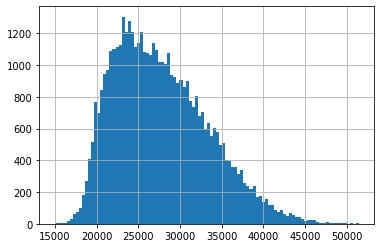

In [36]:
Germany_AuctionComplete.Volume.hist(bins=100)

# API Calling for weather data

In [37]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [38]:
import requests

parameters = { 'q': 'Berlin,Germany',
                'date': '2018-01-01',
               'enddate':'2018-01-31',
                'includelocation': 'yes',
                'tp' : '24',
                'format' : 'json',
                'key' : '66eabe69c2da4417a87112456200301'}

weather = requests.get('https://api.worldweatheronline.com/premium/v1/past-weather.ashx', params = parameters)
                        

In [50]:
# Extract the weather data from the request
# Ref: https://www.worldweatheronline.com/developer/api/docs/historical-weather-api.aspx#weather_element
import json
weather_data = json.loads(weather.content)['data']['weather']
# Get the data of the first day
weather_data[3]

{'date': '2018-01-04',
 'astronomy': [{'sunrise': '08:16 AM',
   'sunset': '04:06 PM',
   'moonrise': '07:26 PM',
   'moonset': '09:52 AM',
   'moon_phase': 'Waxing Gibbous',
   'moon_illumination': '81'}],
 'maxtempC': '7',
 'maxtempF': '45',
 'mintempC': '6',
 'mintempF': '42',
 'avgtempC': '7',
 'avgtempF': '44',
 'totalSnow_cm': '0.0',
 'sunHour': '4.9',
 'uvIndex': '1',
 'hourly': [{'time': '24',
   'tempC': '7',
   'tempF': '45',
   'windspeedMiles': '14',
   'windspeedKmph': '22',
   'winddirDegree': '233',
   'winddir16Point': 'SW',
   'weatherCode': '122',
   'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png'}],
   'weatherDesc': [{'value': 'Overcast'}],
   'precipMM': '0.5',
   'precipInches': '0.0',
   'humidity': '76',
   'visibility': '8',
   'visibilityMiles': '4',
   'pressure': '993',
   'pressureInches': '30',
   'cloudcover': '84',
   'HeatIndexC': '7',
   'HeatIndexF': '44',
   'DewPointC': '3',


# Forecasting

In [40]:
#Moving Average 
# MA example
from statsmodels.tsa.arima_model import ARMA
# contrived dataset
data = [x + Germany_AuctionGroupByDay["01"] for x in range(1,10)]
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[37.76574039]


In [41]:
def above_average (x):
    if x > Germany_AuctionComplete['Prices'].agg('mean'):
        return True
    else:
        return False

In [42]:
Germany_AuctionComplete["Target"] = Germany_AuctionComplete["Prices"].apply(above_average)

In [43]:
Analysis_Price =  pysqldf("""
SELECT avg(Prices) as Avg_Price_Daily,BasePrice,Day
FROM Germany_AuctionComplete
GROUP BY Day
""")


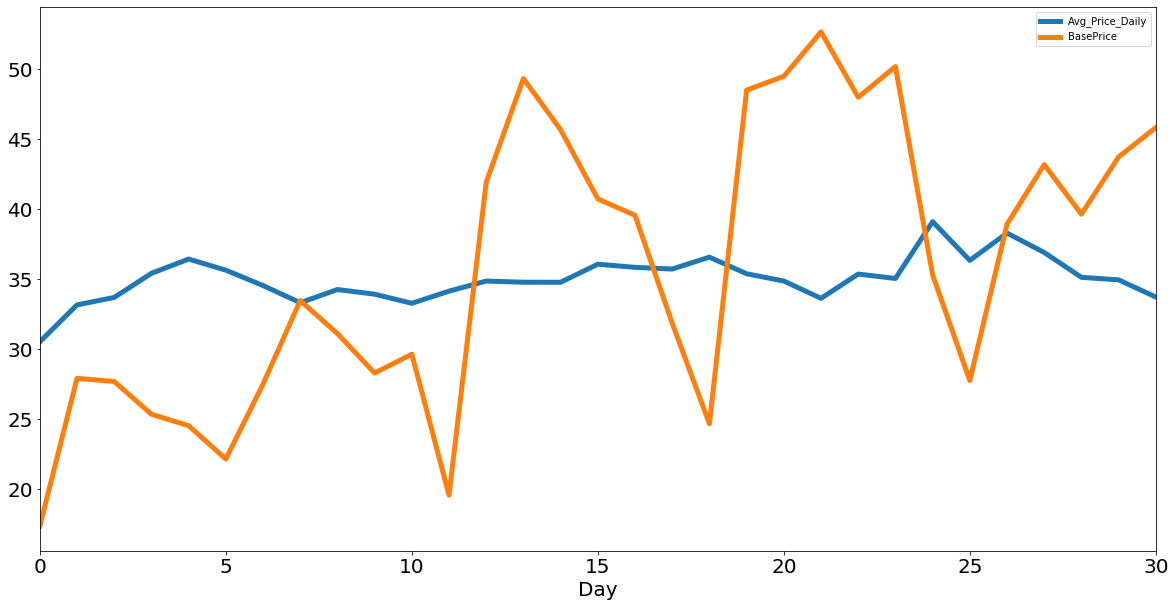

In [44]:
Analysis_Price.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Day', fontsize=20);

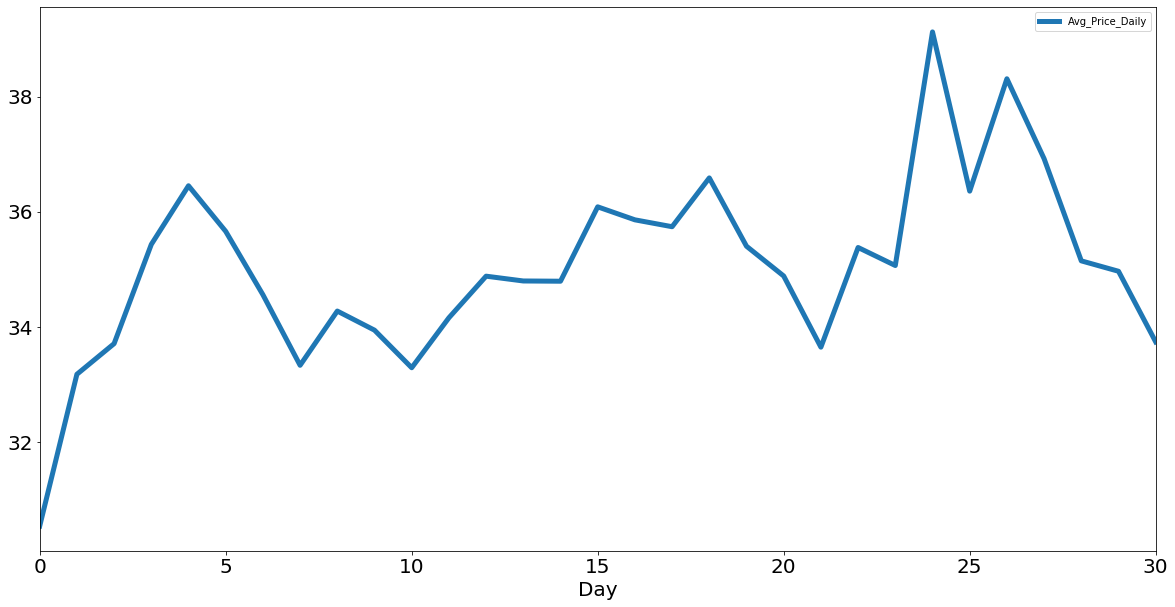

In [45]:
Price = Analysis_Price[['Avg_Price_Daily']]
Price.rolling(1).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Day', fontsize=20);

In [46]:
Price_Corr =  pysqldf("""
SELECT Prices, BasePrice
FROM Germany_AuctionComplete
""")


In [47]:
Price_Corr.diff().corr()

,Prices,BasePrice
Prices,1.000000,0.038779
BasePrice,0.038779,1.000000


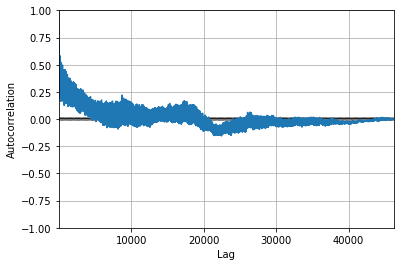

In [48]:
pd.plotting.autocorrelation_plot(Price_Corr)